In [2]:
## Need install mingus and colorChord

## put the colorChord.py in the same folder
## 把colorChord.py放在同一个文件夹， 同时需要安装mingus


## pip install mingus

from typing import List
from mingus.core import *
from mingus.containers import *
import colorChord as cc


In [3]:
## transform the chord in list format to colorChord format
## [C, E, G] -> [cNote.C, cNote.E, cNote.G]
def notes_to_cNotes(notes: List[Note]) -> List[cc.cNote]:
    return [cc.cNote.get_cNote_by_name(note) for note in notes]

## simplify the list of notes
## [C#b, E , F##] -> [C, E, G]
def simplify_chord(chord):
    output = []
    for note in chord:
        note = notes.reduce_accidentals(note)
        output.append(note)
    return output

In [4]:
## The list of chords to be used in the colorChord algorithm -- change as you wish
chord_list = ['C',"C#","D","D#","E","F","F#","G","G#","A","A#","B",
            'Cm',"C#m","Dm","D#m","Em","Fm","F#m","Gm","G#m","Am","A#m","Bm",
            'C7',"C#7","D7","D#7","E7","F7","F#7","G7","G#7","A7","A#7","B7",
            'Cm7',"C#m7","Dm7","D#m7","Em7","Fm7","F#m7","Gm7","G#m7","Am7","A#m7","Bm7",
            'Cmaj7',"C#maj7","Dmaj7","D#maj7","Emaj7","Fmaj7","F#maj7","Gmaj7","G#maj7","Amaj7","A#maj7","Bmaj7",
            'Cm7b5',"C#m7b5","Dm7b5","D#m7b5","Em7b5","Fm7b5","F#m7b5","Gm7b5","G#m7b5","Am7b5","A#m7b5","Bm7b5"]


c_notes_list = [cc.Chord(notes_to_cNotes(simplify_chord(chords.from_shorthand(chord))), name = chord) for chord in chord_list]

#print(c_notes_list)


[Chord C (G, C, E), Chord C# (F, Ab, Db), Chord D (A, D, Fsharp), Chord D# (G, Bb, Eb), Chord E (Ab, B, E), Chord F (A, C, F), Chord F# (Bb, Db, Fsharp), Chord G (D, G, B), Chord G# (C, Eb, Ab), Chord A (A, Db, E), Chord A# (D, F, Bb), Chord B (Eb, Fsharp, B), Chord Cm (G, C, Eb), Chord C#m (Ab, Db, E), Chord Dm (A, D, F), Chord D#m (Bb, Eb, Fsharp), Chord Em (G, B, E), Chord Fm (C, F, Ab), Chord F#m (A, Db, Fsharp), Chord Gm (D, G, Bb), Chord G#m (Eb, Ab, B), Chord Am (A, C, E), Chord A#m (F, Bb, Db), Chord Bm (D, Fsharp, B), Chord C7 (G, C, Bb, E), Chord C#7 (F, Ab, Db, B), Chord D7 (A, D, C, Fsharp), Chord D#7 (G, Bb, Eb, Db), Chord E7 (D, Ab, B, E), Chord F7 (A, C, F, Eb), Chord F#7 (Bb, Db, Fsharp, E), Chord G7 (D, G, F, B), Chord G#7 (C, Eb, Ab, Fsharp), Chord A7 (A, G, Db, E), Chord A#7 (D, F, Bb, Ab), Chord B7 (A, Eb, Fsharp, B), Chord Cm7 (G, C, Bb, Eb), Chord C#m7 (Ab, Db, B, E), Chord Dm7 (A, D, C, F), Chord D#m7 (Bb, Eb, Db, Fsharp), Chord Em7 (D, G, B, E), Chord Fm7 (C, F,

In [5]:
## For basic plot: use matplotlib and numpy
## 如果需要画图，需要安装matplotlib和numpy
## pip install matplotlib
## pip install numpy

import matplotlib.pyplot as plt
import numpy as np


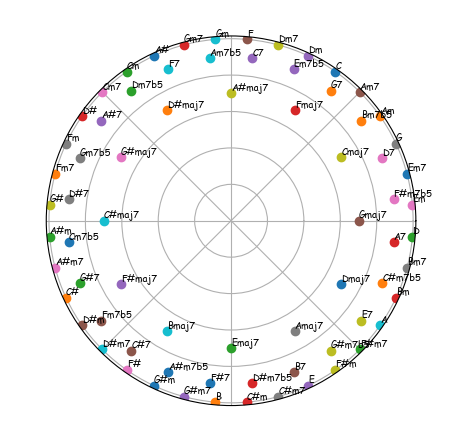

In [6]:
data = [((chord.get_harmony(), min(chord.get_theta())),chord.name) for chord in c_notes_list]


# Convert data to arrays of distances, angles, and labels
distances, angles, labels = zip(*[(d, np.deg2rad(theta), label) for (d, theta), label in data])

# Create polar plot
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.set_theta_zero_location('E')

# Plot points with labels
# Plot points with labels
for distance, angle, label in zip(distances, angles, labels):
    ax.plot(angle, distance, 'o', label=label)
    ax.text(angle, distance, label, ha='left', va='bottom', fontsize= 'x-small', fontfamily= "cursive")
# Add gridlines and legend

ax.grid(True)

## hide the labels (not necessary)
ax.tick_params(axis='both', labelcolor='none')



# Show plot
plt.show()